## Polynomial Regression Model using Boston Housing Dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
###
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
#
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

### Load Data

In [2]:
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

The description of all the features is given below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


### Explore Data

In [6]:
# define the data/predictors as the pre-set feature names  
df_data = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
df_data['PRICE'] = pd.DataFrame(data.target, columns=["MEDV"])

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
df_data.shape

(506, 14)

In [9]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Preprocessing

In [10]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### There is no missing values in the Dataset.

### Data Visualization

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


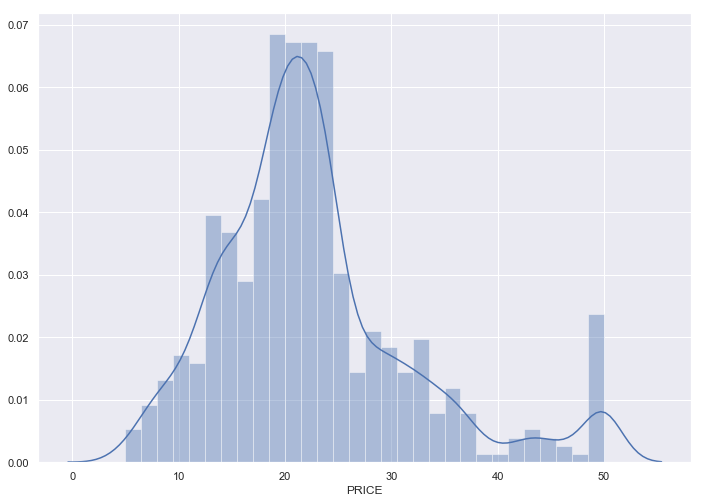

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_data['PRICE'], bins=30)
plt.show()

#### The Price values are Normally Distributed.

#### 1. CRIM VS. PRICE

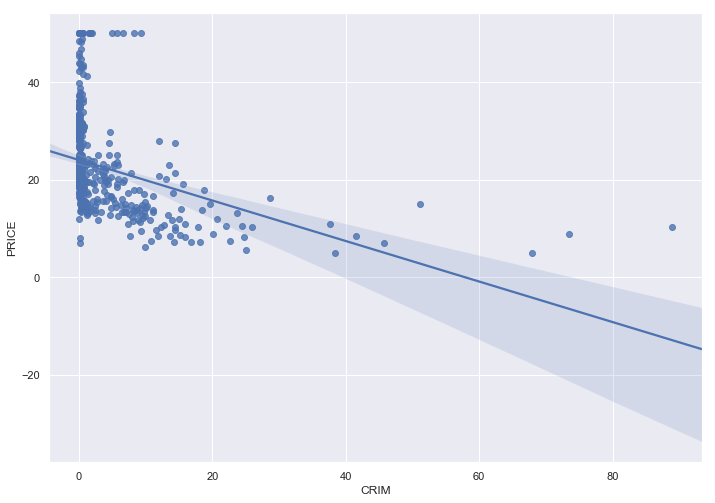

In [12]:
sns.regplot(x="CRIM", y="PRICE", data=df_data)

#### 2. ZN VS. PRICE

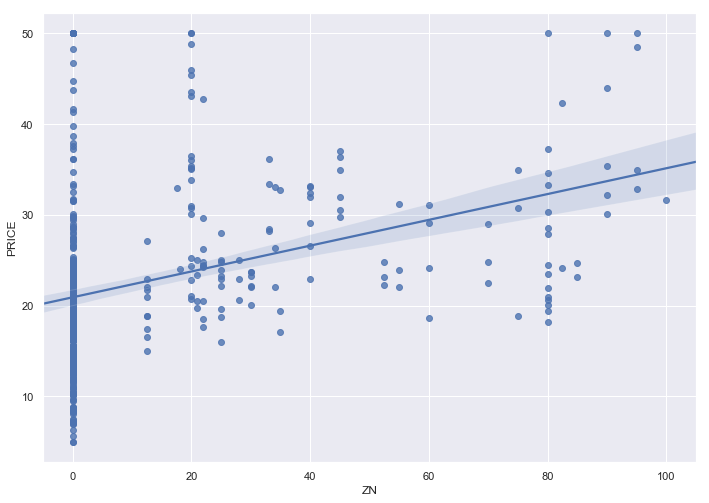

In [13]:
sns.regplot(x="ZN", y="PRICE", data=df_data)

#### 3. INDUS VS. PRICE

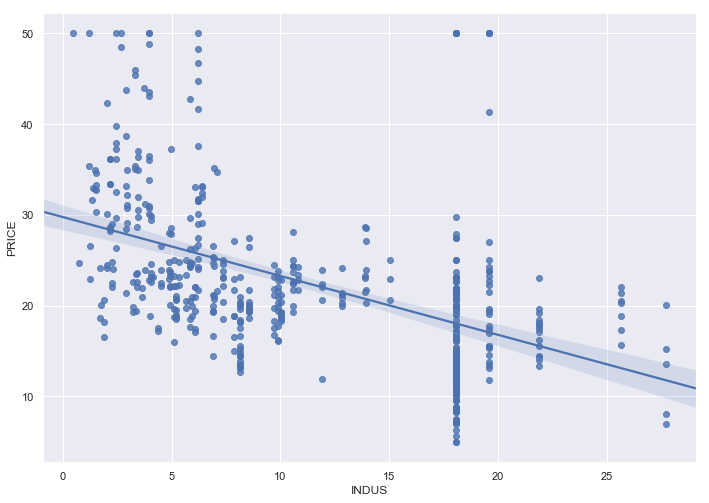

In [14]:
sns.regplot(x="INDUS", y="PRICE", data=df_data)

#### 4. CHAS VS. PRICE

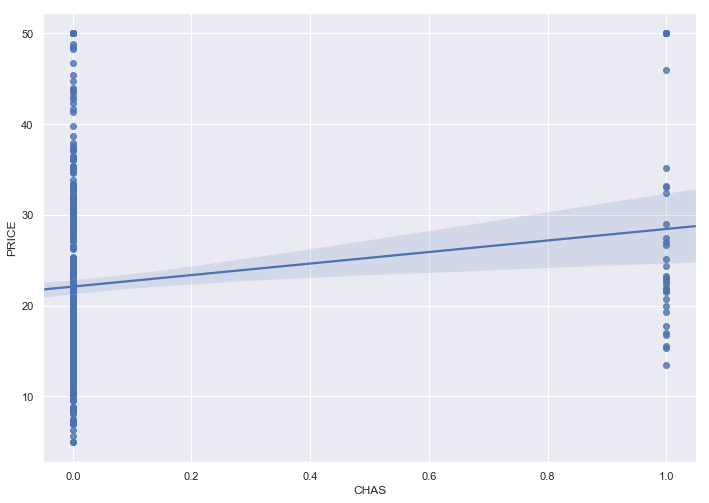

In [15]:
sns.regplot(x="CHAS", y="PRICE", data=df_data)

#### 5. NOX VS. PRICE

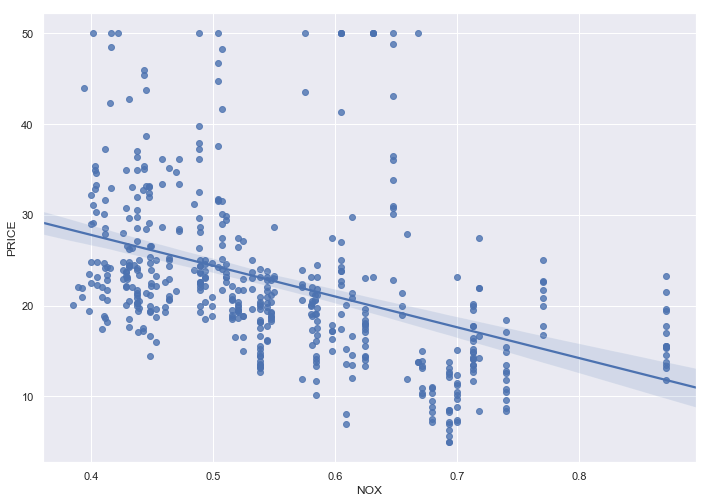

In [16]:
sns.regplot(x="NOX", y="PRICE", data=df_data)

#### 6. RM VS. PRICE

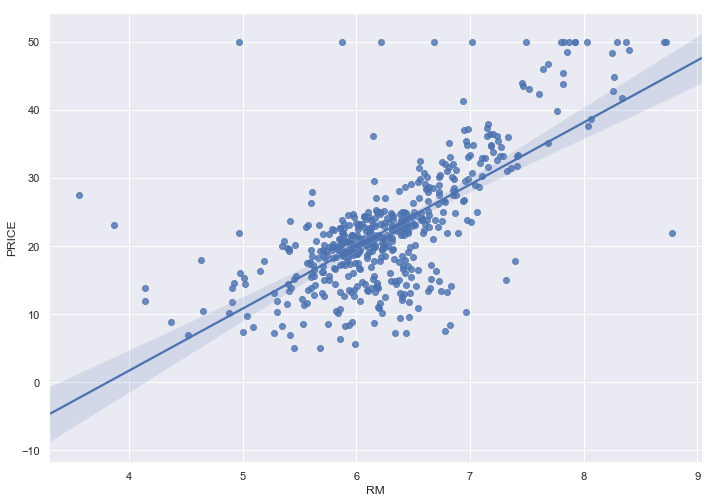

In [17]:
sns.regplot(x="RM", y="PRICE", data=df_data)

#### 7. AGE VS. PRICE

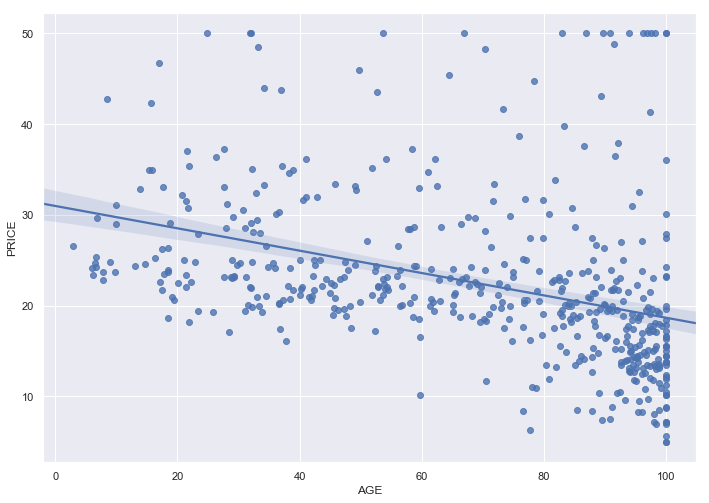

In [18]:
sns.regplot(x="AGE", y="PRICE", data=df_data)

#### 8. DIS VS. PRICE

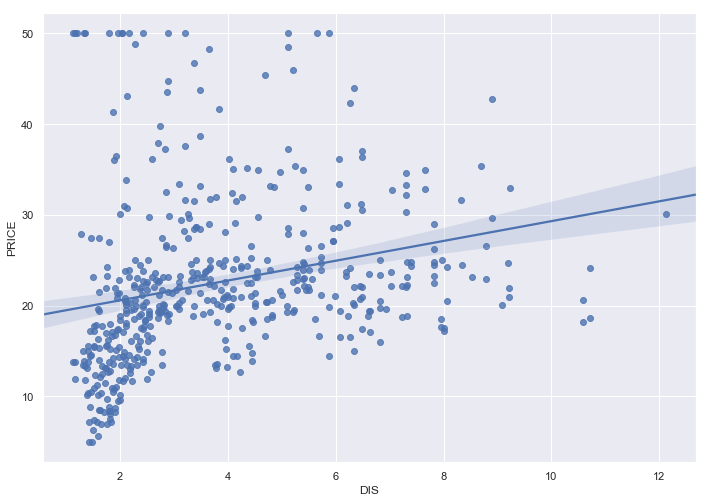

In [19]:
sns.regplot(x="DIS", y="PRICE", data=df_data)

#### 9. RAD VS. PRICE

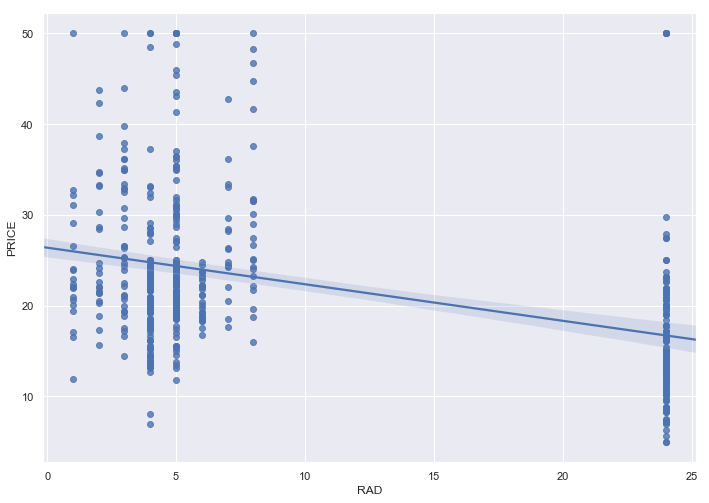

In [20]:
sns.regplot(x="RAD", y="PRICE", data=df_data)

#### 10. TAX VS. PRICE

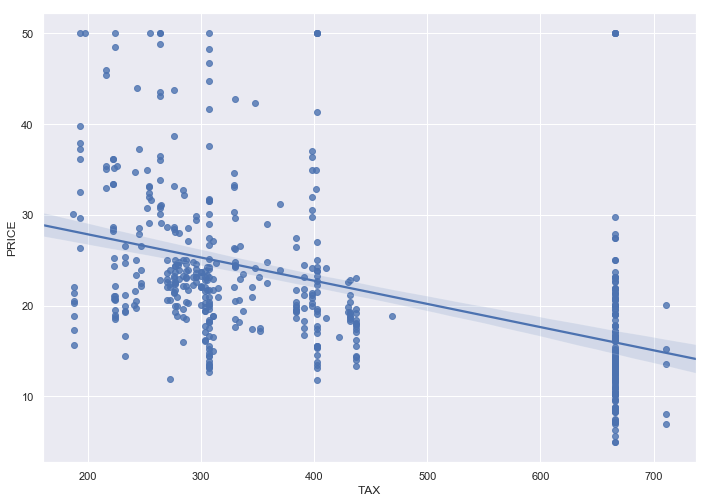

In [21]:
sns.regplot(x="TAX", y="PRICE", data=df_data)

#### 11. PTRATIO VS. PRICE

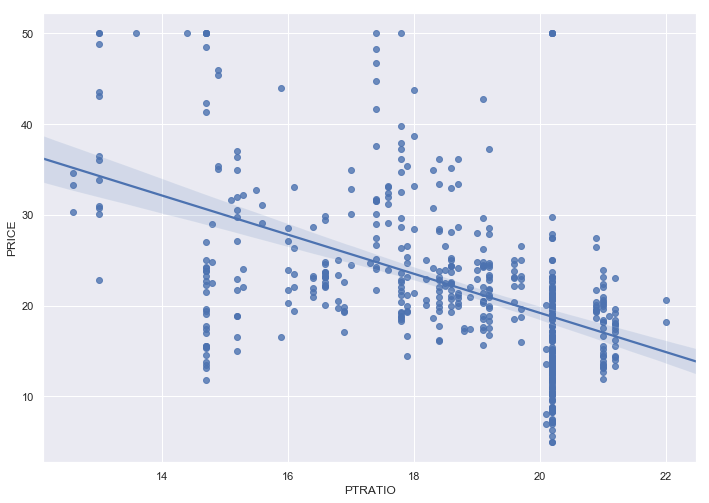

In [22]:
sns.regplot(x="PTRATIO", y="PRICE", data=df_data)

#### 12. B VS. PRICE

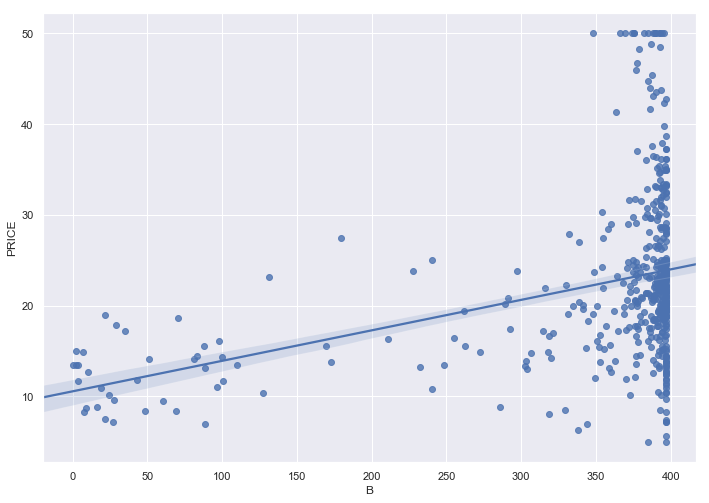

In [23]:
sns.regplot(x="B", y="PRICE", data=df_data)

#### 13. LSTAT VS. PRICE

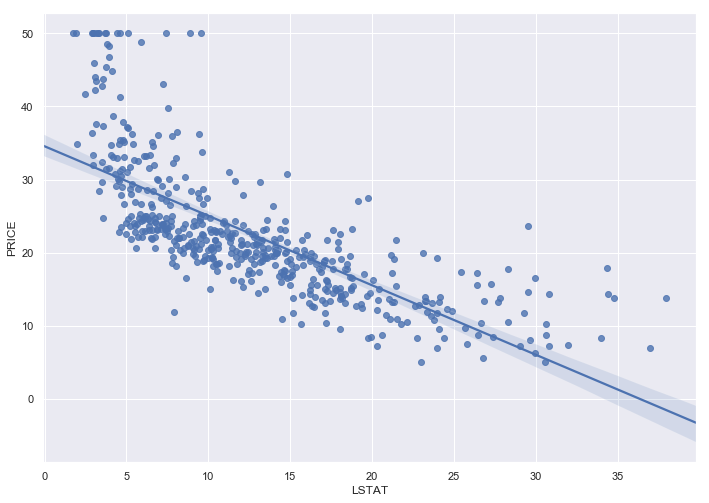

In [24]:
sns.regplot(x="LSTAT", y="PRICE", data=df_data)

#### Corelation Matrix to measure Linear Replations Between Features

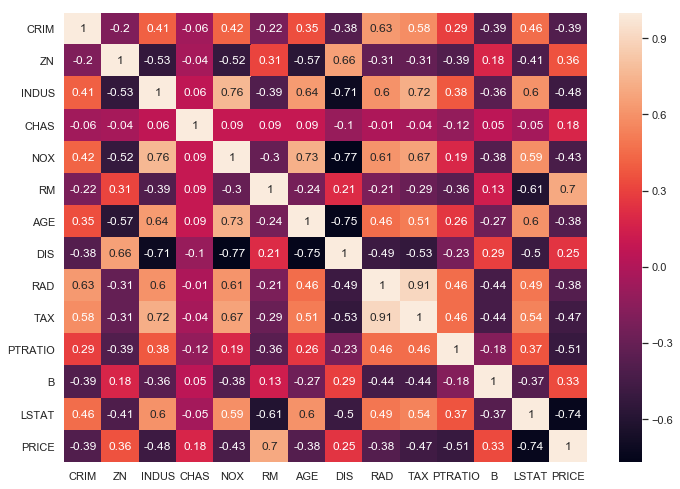

In [25]:
correlation_matrix = df_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)

The correlation coefficient ranges from -1 to 1.

If the value is close to 1, it means that there is a strong positive correlation between the two variables. 

When it is close to -1, the variables have a strong negative correlation.

**Observation**

RM has a strong positive correlation with PRICE (0.7) and LSTAT has a high negative correlation with PRICE(-0.74). Even the above plots confirm the same.

### Linear Regression Model Using one feature -  RM

In [26]:
X = df_data[['RM']]
Y = df_data['PRICE']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 1)
(167, 1)
(339,)
(167,)


In [28]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.coef_

array([8.76572231])

In [30]:
lm.intercept_

-32.59974232819909

#### Prediction

In [31]:
# Prediction for Training set
Y_train_pred = lm.predict(X_train)
# Prediction for Test set
Y_test_pred = lm.predict(X_test)

#### Evaluate the Model

#### R2 Score

In [32]:
r2_train = metrics.r2_score(Y_train, Y_train_pred)
print("The linear model performance for training set: ", r2_train)
r2_test = metrics.r2_score(Y_test, Y_test_pred)
print("The linear model performance for test set: ",r2_test)

The linear model performance for training set:  0.4681065762392672
The linear model performance for test set:  0.5083150699355135


#### Mean Squared Error

In [33]:
mse = metrics.mean_squared_error(Y_test, Y_test_pred)
print("MSE For Test Set:" , mse)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
print("RMSE for Test Set:", rmse)

MSE For Test Set: 46.092441986820035
RMSE for Test Set: 6.789141476418063


#### Plot Linear Regression Model Line

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


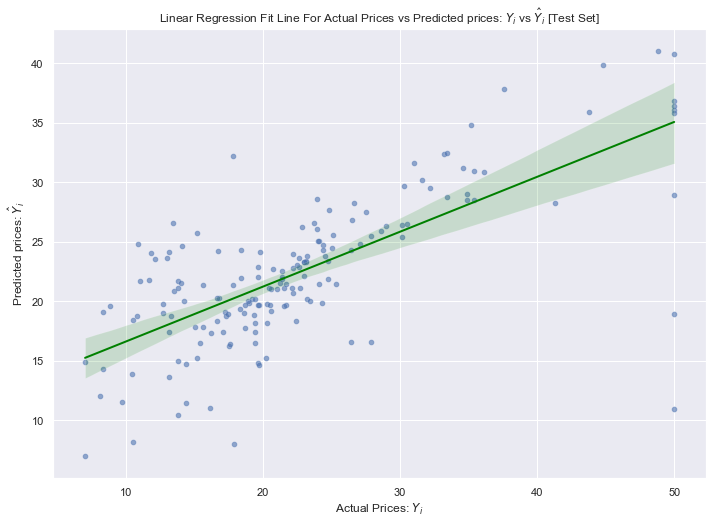

In [34]:
sns.scatterplot(Y_test, Y_test_pred, alpha=0.4)
sns.regplot(Y_test, Y_test_pred, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Linear Regression Fit Line For Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

## Pollynomial Regression Model Using RM Feature

In [35]:
polynomial_features= PolynomialFeatures(degree=4)
X_polly = polynomial_features.fit_transform(X)

In [36]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_polly, Y, test_size = 0.33, random_state = 5)
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(339, 5)
(167, 5)
(339,)
(167,)


In [37]:
lm_polly = LinearRegression()
lm_polly.fit(X_train_1, Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lm_polly.coef_

array([  0.        , 322.97065792, -92.49522828,  11.21578532,
        -0.48241343])

In [39]:
lm_polly.intercept_

-386.9926065784118

#### Prediction

In [40]:
# predicting on training data-set
Y_train_pred_1 = lm_polly.predict(X_train_1)
# predicting on test data-set
Y_test_pred_1 = lm_polly.predict(X_test_1)

#### Evalutae the Pollynomial Regression Model

In [41]:
r2_train_1 = metrics.r2_score(Y_train_1, Y_train_pred_1)
print("The linear model performance for training set: ", r2_train_1)
r2_test_1 = metrics.r2_score(Y_test_1, Y_test_pred_1)
print("The linear model performance for test set: ",r2_test_1)

The linear model performance for training set:  0.5663459356963765
The linear model performance for test set:  0.5829553290529987


In [42]:
mse_1 = metrics.mean_squared_error(Y_test_1, Y_test_pred_1)
print("MSE For Test Set:" , mse_1)
rmse_1 = np.sqrt(metrics.mean_squared_error(Y_test_1, Y_test_pred_1))
print("RMSE for Test Set:", rmse_1)

MSE For Test Set: 39.095376177211655
RMSE for Test Set: 6.252629541018055


/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


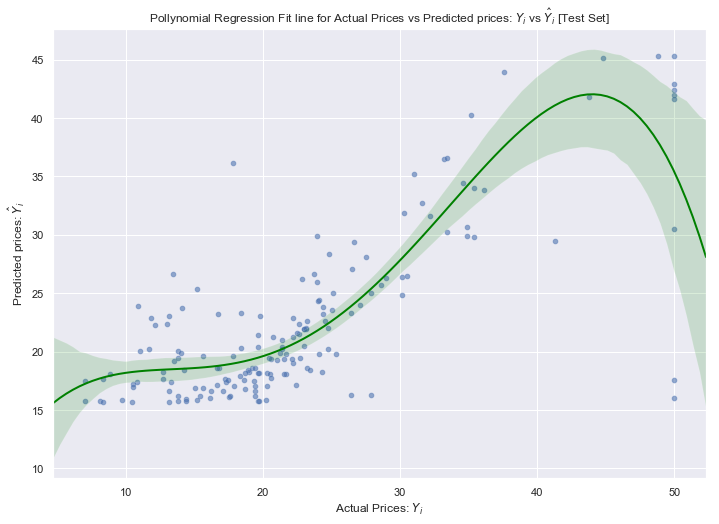

In [43]:
sns.scatterplot(Y_test_1, Y_test_pred_1, alpha=0.4)
sns.regplot(Y_test_1, Y_test_pred_1, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=4)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Pollynomial Regression Fit line for Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()


### Conclusion

As Expected, the Pollynomial Regression Model Performed better than the Linear Regression Model, even using a single feature. 